In [2]:
print(4*15)

60


In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse import csr_array
from scipy import special as sp
import math

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
import math

In [3]:
class SimulationGrid:
    def __init__(self, N):
        self.dx = 1/N
        self.dt = None
        self.initialize(N)
        self.shape = self.current.shape
    
    def initialize(self,N):
        self.D = 1 
        self.dt = (self.dx**2)/(4*self.D)
        A = np.zeros((N+1, N+1))
        A[0,:] = 1
        self.current = A 
        
    def diffusion_iteration(self, tmax, frequency=10):
        A = self.current
        dt = self.dt
        dx = self.dx
        term = (self.dt*self.D)/(self.dx**2)
        current_time = 0
        data = [A]
        times = np.arange(0,tmax+dt, dt)
        Ax = A.copy()
        nrows, ncols = A.shape
        sampling_timer = [None]
        sampling_times = []
        
        for iteration in times: 
            A0 = data[-1] 
            for k in range(1, nrows-1):
                for j in range(1, ncols-1):
                    Ax[k,j] = A0[k, j] + term*(A0[k-1, j] + A0[k+1, j] + A0[k,j-1] + A0[k, j] - (4*A0[k, j]))
            Ax[:,0] = Ax[:,1]
            Ax[:,-1] = Ax[:,-2]
            sampling_timer.pop()
            
            if len(sampling_timer) < 1:
                data.append(Ax.copy())
                sampling_times.append(iteration)
                sampling_timer = [k for k in range(frequency)]
        
        return data, np.array(sampling_times)
    
        
test = SimulationGrid(50)
data, times = test.diffusion_iteration(1,10)

1002
[0.    0.001 0.002 ... 0.998 0.999 1.   ]
51


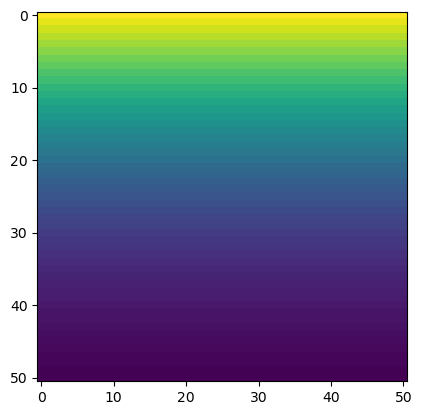

In [4]:
print(len(data))
print(times)
print(len(data[0][:,0][::-1]))
plt.imshow(data[-1])

In [5]:
def c_analytical(y, t, D=1, n_steps=100):
    """
    Returns analytical solution of diffusion equation
    Inputs:
        - y: y axis solution
        - t: time stepsize
        - T: total time
    """

    lst = []
    for y_i in y:
        for i in range(0,n_steps):
            arg1 = math.erfc((1 - y_i + (2*i)) /(2 * np.sqrt(D*t)))
            arg2 = math.erfc((1 + y_i + (2*i)) /(2 * np.sqrt(D*t)))
            result = arg1-arg2
    lst.append(result)
    return np.array(lst)


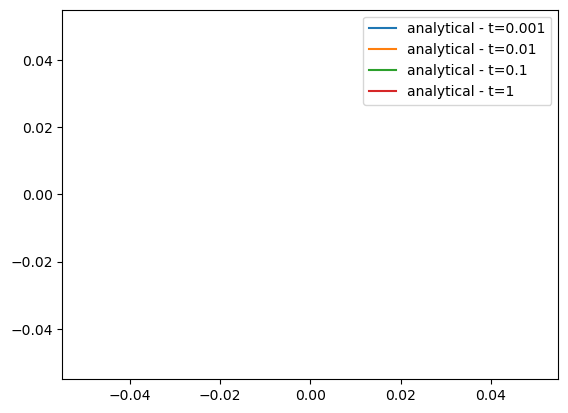

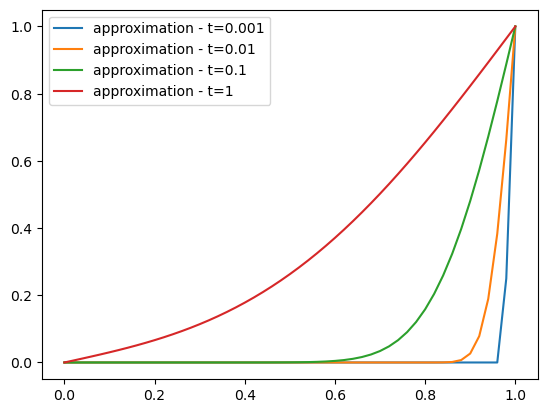

In [7]:

y_input = np.linspace(0,1,50)
time_show = [0.001, 0.01, 0.1, 1] 

for t in time_show:
    result = c_analytical(y_input,t)
    text = f"analytical - t={t}"
    plt.plot(result,label=text)
    plt.legend()
plt.show()
    
indices = np.where(np.isin( times, time_show))[0]

for k in range(len(indices)):
    indx = indices[k]
    text = f"approximation - t={time_show[k]}"
    column = data[indx][:,0][::-1]
    ys = np.linspace(0,1,len(column))
    plt.plot(ys,column, label = text)
    plt.legend()